# Data Exploration


### Imports

In [2]:
import os
import sys
import numpy as np
import pandas as pd

In [3]:
src_path = os.path.abspath('../src/')
sys.path.append(src_path)

In [4]:
# to allow for all variables to be displayed in jupyter
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [5]:
def correlation_proportion_graph(correlation_matrix, columns, threshold=0.95):
    """
    - Gives proportion of droppable variables
    - Creates a graph mapping proportions of correlation for each level of correlation
    - Returns list of droppable variables
    """
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print(f"{round((len(to_drop)/len(columns))*100, 2)}% of the variables ({len(to_drop)}) are above the {threshold} correlation level.")
    r = np.linspace(0,1,101)
    portion = [len([column for column in upper.columns if any(upper[column] > ratio)])/len(columns) for ratio in r]
    plt.plot(r,portion)
    plt.ylabel("Percentage of Numerical Features")
    plt.xlabel("Level of correlation (absolute)")
    plt.title("Proportions of Correlated Numeric Features")
    plt.show()
    return to_drop

### Data

In [6]:
input_loc = '../data/processed/'
output_loc = '../data/processed/'

In [21]:
# read in aggregated and non-aggregated('df_micro') data
df_micro = pd.read_pickle(input_loc + 'all_missing_excluded.pkl')
df = pd.read_pickle(input_loc + 'macro_engineered.pkl')

### Exploratory Analysis

#### Statistical Description

In [15]:
# scan categorical variables for frequency and primary
df.describe(include=np.object).T

,count,unique,top,freq
geoid,87109,87109,#_420210120001,1
name,87109,87109,"Block Group 2, Census Tract 2903, Midland Coun...",1
county_name,87109,1637,Los Angeles County,1877
state_name,87109,51,New York,8609


In [16]:
# scan numerical variables for strange mins, maxes...etc.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tot_population,87109.0,1459.949523,971.656035,9.000000,885.000000,1249.000000,1779.000000,47727.000000
in_poverty,87109.0,230.055207,232.971667,0.000000,75.000000,164.000000,311.000000,8037.000000
inc_pct_poverty,87109.0,0.171343,0.144658,0.000000,0.060606,0.131440,0.244726,1.000000
inc_pcincome,87109.0,27741.312884,13635.837078,1086.000000,18780.000000,25212.000000,33361.000000,247983.000000
age_pct_under25,87109.0,0.825023,0.118819,0.035186,0.752852,0.820225,0.891778,1.703196
age_pct_25_64,87109.0,0.525344,0.083323,0.010870,0.478565,0.526022,0.573225,1.000000
age_pct_over65,87109.0,0.161251,0.090437,0.000000,0.099723,0.148276,0.204856,0.937198
educ_tot_pop,87109.0,1004.431689,643.267286,17.000000,615.000000,867.000000,1233.000000,39486.000000
educ_no_school,87109.0,0.015265,0.025543,0.000000,0.000000,0.004839,0.020604,0.472262
educ_nursery_4th,87109.0,0.007461,0.019901,0.000000,0.000000,0.000000,0.002791,0.380117


In [17]:
# isolate non-percentile variables and strange proportions ('house_density')
df.describe().T[df.describe().T['max'] > 1].T.iloc[:, :-1].columns

Index(['tot_population', 'in_poverty', 'inc_pcincome', 'age_pct_under25',
       'educ_tot_pop', 'total_pop_16_plus', 'house_tot_occ_cnt',
       'total_housing_units', 'house_tot_owned', 'house_density',
       'at_least_one_alarm', 'visits'],
      dtype='object')

In [18]:
df[df.age_pct_under25 > 1] #likely due to underlying feature miscalculation

,geoid,name,county_name,state_name,tot_population,in_poverty,inc_pct_poverty,inc_pcincome,age_pct_under25,age_pct_25_64,age_pct_over65,educ_tot_pop,educ_no_school,educ_nursery_4th,educ_5th_6th,educ_7th_8th,educ_9th,educ_10th,educ_11th,educ_12th_no_diploma,educ_high_school_grad,educ_col_less_1_yr,educ_some_col_no_grad,educ_associates,educ_bachelors,educ_masters,educ_professional,educ_docterate,total_pop_16_plus,worked_past_12_mo,did_not_work_past_12_mo,race_pct_white,race_pct_whitenh,race_pct_nonwhite,race_pct_nonwhitenh,race_pct_amind,race_pct_black,race_pct_hisp,house_tot_occ_cnt,house_pct_family,house_pct_family_married,house_pct_family_male_hh,house_pct_family_female_hh,house_pct_non_family,house_pct_live_alone,house_pct_no_live_alone,total_housing_units,house_pct_occupied,house_pct_vacant,house_pct_ownd_occupied,house_pct_rent_occupied,house_pct_1_room,house_pct_2_room,house_pct_3_room,house_pct_4_room,house_pct_5_room,house_pct_6_room,house_pct_7_room,house_pct_8_room,house_pct_9_plus_room,house_yr_pct_2014_plus,house_yr_pct_2010_2013,house_yr_pct_2000_2009,house_yr_pct_1990_1999,house_yr_pct_1980_1989,house_yr_pct_1970_1979,house_yr_pct_1960_1969,house_yr_pct_1950_1959,house_yr_pct_1940_1949,house_yr_pct_earlier_1939,heat_pct_utility_gas,heat_pct_bottled_tank_lpgas,heat_pct_electricity,heat_pct_fueloil_kerosene,heat_pct_coal,heat_pct_wood,heat_pct_solar,heat_pct_other,heat_pct_no_fuel,house_pct_complete_plumb,house_pct_incomplete_plumb,house_pct_complete_kitchen,house_pct_incomplete_kitchen,house_tot_w_mort,house_w_1_mort,house_w_2_mort,house_w_home_equity_loan,house_w_both_2_mort_and_loan,house_no_mort,house_tot_owned,house_val_less_10k,house_val_10k_15k,house_val_15k_20k,house_val_20k_25k,house_val_25k_30k,house_val_30k_35k,house_val_35k_40k,house_val_40k_50k,house_val_50k_60k,house_val_60k_70k,house_val_70k_80k,house_val_80k_90k,house_val_90k_100k,house_val_100k_125k,house_val_125k_150k,house_val_150k_175k,house_val_175k_200k,house_val_200k_250k,house_val_250k_300k,house_val_300k_400k,house_val_400k_500k,house_val_500k_750k,house_val_750k_1m,house_val_1m_1.5m,house_val_1.5m_2m,house_val_more_2m,house_density_occ,house_density,at_least_one_alarm,visits,occ_housing_visited,visits_one_plus_alarms
1,#_530039603002,"Block Group 2, Census Tract 9603, Asotin Count...",Asotin County,Washington,911,141,0.154775,17883.0,1.062569,0.473106,0.127333,547,0.000000,0.000000,0.000000,0.042048,0.060329,0.014625,0.000000,0.010969,0.226691,0.151737,0.188300,0.111517,0.193784,0.000000,0.000000,0.000000,772,0.674870,0.325130,0.774973,0.767289,0.225027,0.232711,0.173436,0.007684,0.225027,415,0.460241,0.144578,0.048193,0.267470,0.539759,0.481928,0.057831,462,0.898268,0.101732,0.453012,0.546988,0.021645,0.038961,0.190476,0.166667,0.086580,0.268398,0.045455,0.047619,0.134199,0.000000,0.000000,0.000000,0.164502,0.049784,0.108225,0.114719,0.127706,0.216450,0.218615,0.590361,0.036145,0.373494,0.000000,0.0,0.0,0.00000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.595745,0.595745,0.000000,0.000000,0.000000,0.404255,188,0.000000,0.000000,0.000000,0.000000,0.0,0.053191,0.0,0.00000,0.000000,0.111702,0.000000,0.085106,0.202128,0.031915,0.186170,0.170213,0.090426,0.042553,0.000000,0.026596,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.455543,0.507135,1.0,1,0.002410,1.000000
31,#_530050112003,"Block Group 3, Census Tract 112, Benton County...",Benton County,Washington,1484,833,0.561321,12240.0,1.104895,0.355372,0.106167,726,0.071625,0.000000,0.000000,0.005510,0.024793,0.000000,0.000000,0.028926,0.552342,0.048209,0.165289,0.035813,0.059229,0.008264,0.000000,0.000000,950,0.505263,0.494737,0.610299,0.444374,0.389701,0.555626,0.000000,0.003814,0.511125,412,0.779126,0.271845,0.000000,0.507282,0.220874,0.128641,0.092233,412,1.000000,0.000000,0.322816,0.677184,0.000000,0.000000,0.000000,0.223301,0.412621,0.063107,0.169903,0.000000,0.131068,0.000000,0.000000,0.114078,0.000000,0.046117,0.128641,0.099515,0.524272,0.065534,0.021845,0.099515,0.000000,0.900485,0.0000

In [19]:
# checking block groups where houses outnumber population
df[df.house_density > 1]

,geoid,name,county_name,state_name,tot_population,in_poverty,inc_pct_poverty,inc_pcincome,age_pct_under25,age_pct_25_64,age_pct_over65,educ_tot_pop,educ_no_school,educ_nursery_4th,educ_5th_6th,educ_7th_8th,educ_9th,educ_10th,educ_11th,educ_12th_no_diploma,educ_high_school_grad,educ_col_less_1_yr,educ_some_col_no_grad,educ_associates,educ_bachelors,educ_masters,educ_professional,educ_docterate,total_pop_16_plus,worked_past_12_mo,did_not_work_past_12_mo,race_pct_white,race_pct_whitenh,race_pct_nonwhite,race_pct_nonwhitenh,race_pct_amind,race_pct_black,race_pct_hisp,house_tot_occ_cnt,house_pct_family,house_pct_family_married,house_pct_family_male_hh,house_pct_family_female_hh,house_pct_non_family,house_pct_live_alone,house_pct_no_live_alone,total_housing_units,house_pct_occupied,house_pct_vacant,house_pct_ownd_occupied,house_pct_rent_occupied,house_pct_1_room,house_pct_2_room,house_pct_3_room,house_pct_4_room,house_pct_5_room,house_pct_6_room,house_pct_7_room,house_pct_8_room,house_pct_9_plus_room,house_yr_pct_2014_plus,house_yr_pct_2010_2013,house_yr_pct_2000_2009,house_yr_pct_1990_1999,house_yr_pct_1980_1989,house_yr_pct_1970_1979,house_yr_pct_1960_1969,house_yr_pct_1950_1959,house_yr_pct_1940_1949,house_yr_pct_earlier_1939,heat_pct_utility_gas,heat_pct_bottled_tank_lpgas,heat_pct_electricity,heat_pct_fueloil_kerosene,heat_pct_coal,heat_pct_wood,heat_pct_solar,heat_pct_other,heat_pct_no_fuel,house_pct_complete_plumb,house_pct_incomplete_plumb,house_pct_complete_kitchen,house_pct_incomplete_kitchen,house_tot_w_mort,house_w_1_mort,house_w_2_mort,house_w_home_equity_loan,house_w_both_2_mort_and_loan,house_no_mort,house_tot_owned,house_val_less_10k,house_val_10k_15k,house_val_15k_20k,house_val_20k_25k,house_val_25k_30k,house_val_30k_35k,house_val_35k_40k,house_val_40k_50k,house_val_50k_60k,house_val_60k_70k,house_val_70k_80k,house_val_80k_90k,house_val_90k_100k,house_val_100k_125k,house_val_125k_150k,house_val_150k_175k,house_val_175k_200k,house_val_200k_250k,house_val_250k_300k,house_val_300k_400k,house_val_400k_500k,house_val_500k_750k,house_val_750k_1m,house_val_1m_1.5m,house_val_1.5m_2m,house_val_more_2m,house_density_occ,house_density,at_least_one_alarm,visits,occ_housing_visited,visits_one_plus_alarms
44,#_530079601002,"Block Group 2, Census Tract 9601, Chelan Count...",Chelan County,Washington,739,188,0.254398,26795.0,0.568000,0.496000,0.400000,672,0.000000,0.03125,0.004464,0.017857,0.017857,0.038690,0.041667,0.019345,0.288690,0.062500,0.180060,0.043155,0.110119,0.107143,0.005952,0.031250,713,0.415147,0.584853,0.936000,0.898667,0.064000,0.101333,0.018667,0.000000,0.044000,369,0.571816,0.520325,0.021680,0.029810,0.428184,0.352304,0.075881,851,0.433608,0.566392,0.739837,0.260163,0.044653,0.091657,0.105758,0.279671,0.153937,0.159812,0.057579,0.024677,0.082256,0.000000,0.005875,0.129260,0.131610,0.069330,0.183314,0.178613,0.092832,0.059929,0.149236,0.029810,0.000000,0.875339,0.016260,0.0,0.078591,0.0,0.000000,0.000000,0.833137,0.166863,0.848414,0.151586,0.534799,0.494505,0.000000,0.040293,0.000000,0.465201,273,0.021978,0.000000,0.000000,0.000000,0.018315,0.000000,0.000000,0.000000,0.000000,0.000000,0.029304,0.000000,0.084249,0.040293,0.021978,0.029304,0.043956,0.051282,0.223443,0.201465,0.139194,0.080586,0.014652,0.000000,0.000000,0.000000,0.499323,1.151556,1.0,1,0.002710,1.00000
45,#_530079602001,"Block Group 1, Census Tract 9602, Chelan Count...",Chelan County,Washington,955,266,0.278534,22075.0,0.652129,0.370717,0.489097,828,0.000000,0.00000,0.000000,0.038647,0.000000,0.000000,0.000000,0.091787,0.341787,0.076087,0.097826,0.049517,0.170290,0.083333,0.050725,0.000000,925,0.390270,0.609730,0.932503,0.932503,0.067497,0.067497,0.034268,0.033229,0.000000,493,0.523327,0.468560,0.022312,0.032454,0.476673,0.363083,0.113590,1894,0.260296,0.739704,0.896552,0.103448,0.008448,0.036959,0.054382,0.274023,0.209081,0.331045,0.036431,0.008976,0.040655,0.079197,0.052270,0.184794,0.226505,0.159451,0.140971,0.022703,0.100317,0.007392,0.026399,0.0

### Temporal Distribution

In [22]:
# checking date range for non-aggregated data
df_micro.in_home_visit_date.describe()

count                  533064
unique                   1734
top       2018-04-28 00:00:00
freq                    11029
first     2014-06-04 00:00:00
last      2020-02-29 00:00:00
Name: in_home_visit_date, dtype: object

In [24]:
# checking date
df_micro.groupby(df_micro.in_home_visit_date.map(lambda x: x.year)).geoid.agg('count').sort_values(ascending=False)

in_home_visit_date
2019    159497
2018    144407
2017    139205
2016     71393
2020     17869
2015       616
2014        77
Name: geoid, dtype: int64

In [26]:
# show frequency distribution by year and month
df_micro.groupby([df_micro.in_home_visit_date.dt.year.rename('year'), df_micro.in_home_visit_date.dt.month.rename('month')]).geoid.agg({'count'}).T

year  2014                 2015                                                \
month   6  8  9  10  11 12   1   2   3   4   5   6   7   8   9    10   11  12   
count    3  3  1  8  57  5   39  16  11  14  44  23  23  59  59  166  103  59   

year  2016                                                                    \
month   1    2    3    4     5     6     7     8     9      10     11     12   
count  296  321  382  563  1081  1816  4391  8801  9772  19113  13374  11483   

year    2017                                                              \
month     1      2      3      4      5      6     7     8     9      10   
count  14845  11488  15819  17660  11490  13763  7818  8437  8456  11875   

year                2018                                                      \
month    11    12     1     2      3      4      5      6     7     8     9    
count  9808  7746  10276  9001  10582  20856  27889  12006  7363  8616  8994   

year                      2019                                                \
month     10    11    12    1     2      3      4      5      6     7     8    
count  11031  9890  7903  9489  9055  11570  23656  30509  13431  8018  8358   

year                              2020        
month    9      10     11    12     1     2   
count  9985  13380  13603  8443  10743  7126

Bulk of the data from 2016 onward. Visits are unlikely to be to the same residences.

### Geographic Distribution

In [109]:
# create lightweight df for geographic distribution
visits_df = pd.merge(df.loc[:, ['geoid','visits', 'occ_housing_visited', 'visits_one_plus_alarms']], df_micro.loc[:, ['geoid', 'census_block_group_y', 'census_block_group_x']], on='geoid', how='inner')

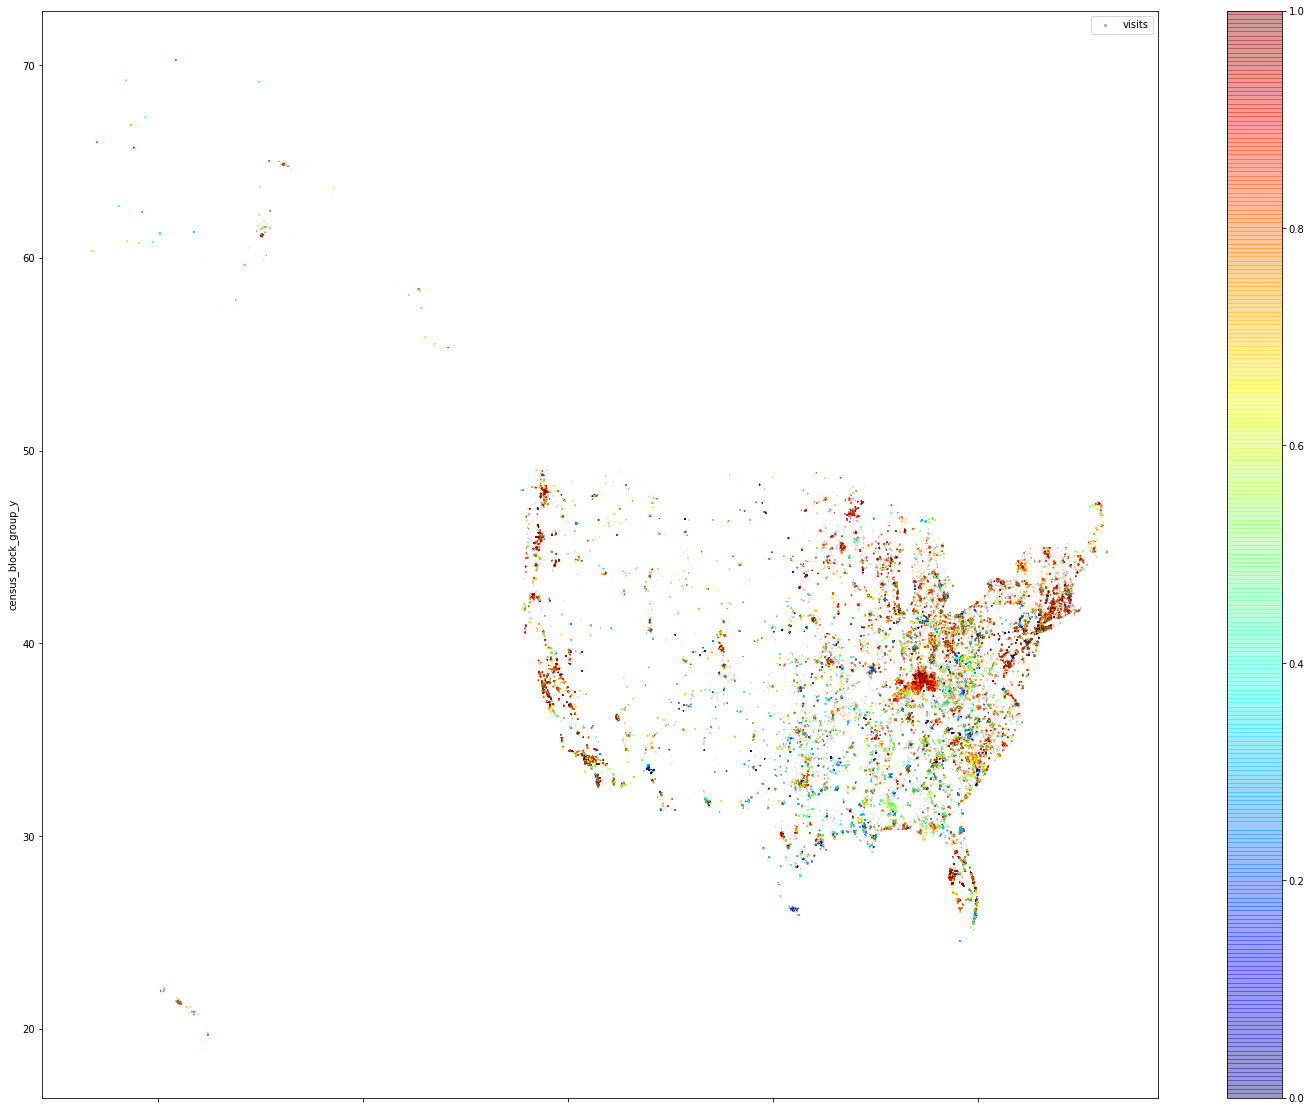

In [112]:
# plot percentage of occupied houses visited and percentage of visits with at least one pre-existing alarm on a map
visits_df.plot(kind="scatter", x="census_block_group_x", y="census_block_group_y", alpha=0.4, s=visits_df.occ_housing_visited, label="visits", figsize=(25,20), c=visits_df.visits_one_plus_alarms, cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
plt.show()

It looks like the visited areas least likely to have pre-installed alarms are in the Midwest and the South

In [123]:
# show where the highest proportion of occupied housing is visited
df[['geoid', 'county_name', 'state_name', 'tot_population', 'house_tot_occ_cnt', 'visits', 'occ_housing_visited', 'visits_one_plus_alarms']].sort_values(by=['occ_housing_visited'], ascending=False).iloc[:50]

,geoid,county_name,state_name,tot_population,house_tot_occ_cnt,visits,occ_housing_visited,visits_one_plus_alarms
49825,#_360050302006,Bronx County,New York,119,62,669,10.790323,0.811659
4799,#_040136145003,Maricopa County,Arizona,180,32,44,1.375000,0.272727
50054,#_360050462019,Bronx County,New York,734,461,579,1.255965,0.811744
57332,#_361059508001,Sullivan County,New York,87,9,11,1.222222,0.727273
62386,#_390490043003,Franklin County,Ohio,188,75,61,0.813333,0.540984
14683,#_120090652354,Brevard County,Florida,1187,508,388,0.763780,0.845361
1192,#_530619400023,Snohomish County,Washington,709,311,229,0.736334,0.650655
57821,#_361190149092,Westchester County,New York,968,477,350,0.733753,0.785714
53260,#_360550142031,Monroe County,New York,296,97,70,0.721649,0.885714
14680,#_120090652351,Brevard County,Florida,977,587,340,0.579216,0.732353


As noted in cleaning, there seems to be erroneous values, possibly due to changes in block group borders between years

In [114]:
# show the most visits
df.geoid.value_counts()

#_360050462013    1863
#_360050302005    1250
#_360050462014     746
#_360050302006     669
#_360050462019     579
                  ... 
#_172010005142       1
#_132619503002       1
#_511259503002       1
#_481830003005       1
#_060990024021       1
Name: geoid, Length: 87109, dtype: int64

#### Correlation

In [48]:
#drop the non-percentage variables to prevent correlation skew
kept_columns = [var for var in df.columns if var.find('tot') == -1]
kept_columns.remove('inc_pcincome')
kept_columns.remove('in_poverty')

['geoid',
 'name',
 'county_name',
 'state_name',
 'inc_pct_poverty',
 'age_pct_under25',
 'age_pct_25_64',
 'age_pct_over65',
 'educ_no_school',
 'educ_nursery_4th',
 'educ_5th_6th',
 'educ_7th_8th',
 'educ_9th',
 'educ_10th',
 'educ_11th',
 'educ_12th_no_diploma',
 'educ_high_school_grad',
 'educ_col_less_1_yr',
 'educ_some_col_no_grad',
 'educ_associates',
 'educ_bachelors',
 'educ_masters',
 'educ_professional',
 'educ_docterate',
 'worked_past_12_mo',
 'did_not_work_past_12_mo',
 'race_pct_white',
 'race_pct_whitenh',
 'race_pct_nonwhite',
 'race_pct_nonwhitenh',
 'race_pct_amind',
 'race_pct_black',
 'race_pct_hisp',
 'house_pct_family',
 'house_pct_family_married',
 'house_pct_family_male_hh',
 'house_pct_family_female_hh',
 'house_pct_non_family',
 'house_pct_live_alone',
 'house_pct_no_live_alone',
 'house_pct_occupied',
 'house_pct_vacant',
 'house_pct_ownd_occupied',
 'house_pct_rent_occupied',
 'house_pct_1_room',
 'house_pct_2_room',
 'house_pct_3_room',
 'house_pct_4_room

In [49]:
# generate correlation matrix of relevant variables
corr_matrix = df[kept_columns].corr().abs()

8.2% of the variables (10) are above the 0.9 correlation level.


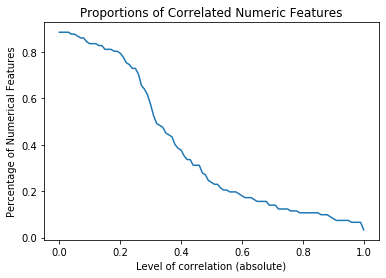

['did_not_work_past_12_mo',
 'race_pct_nonwhite',
 'race_pct_nonwhitenh',
 'house_pct_non_family',
 'house_pct_live_alone',
 'house_pct_vacant',
 'house_pct_rent_occupied',
 'house_pct_incomplete_plumb',
 'house_pct_incomplete_kitchen',
 'visits']

In [50]:
# plot correlated variables
correlation_proportion_graph(corr_matrix, df.columns, 0.9)

*Possibly drop these later after baseline modeling in next notebook*

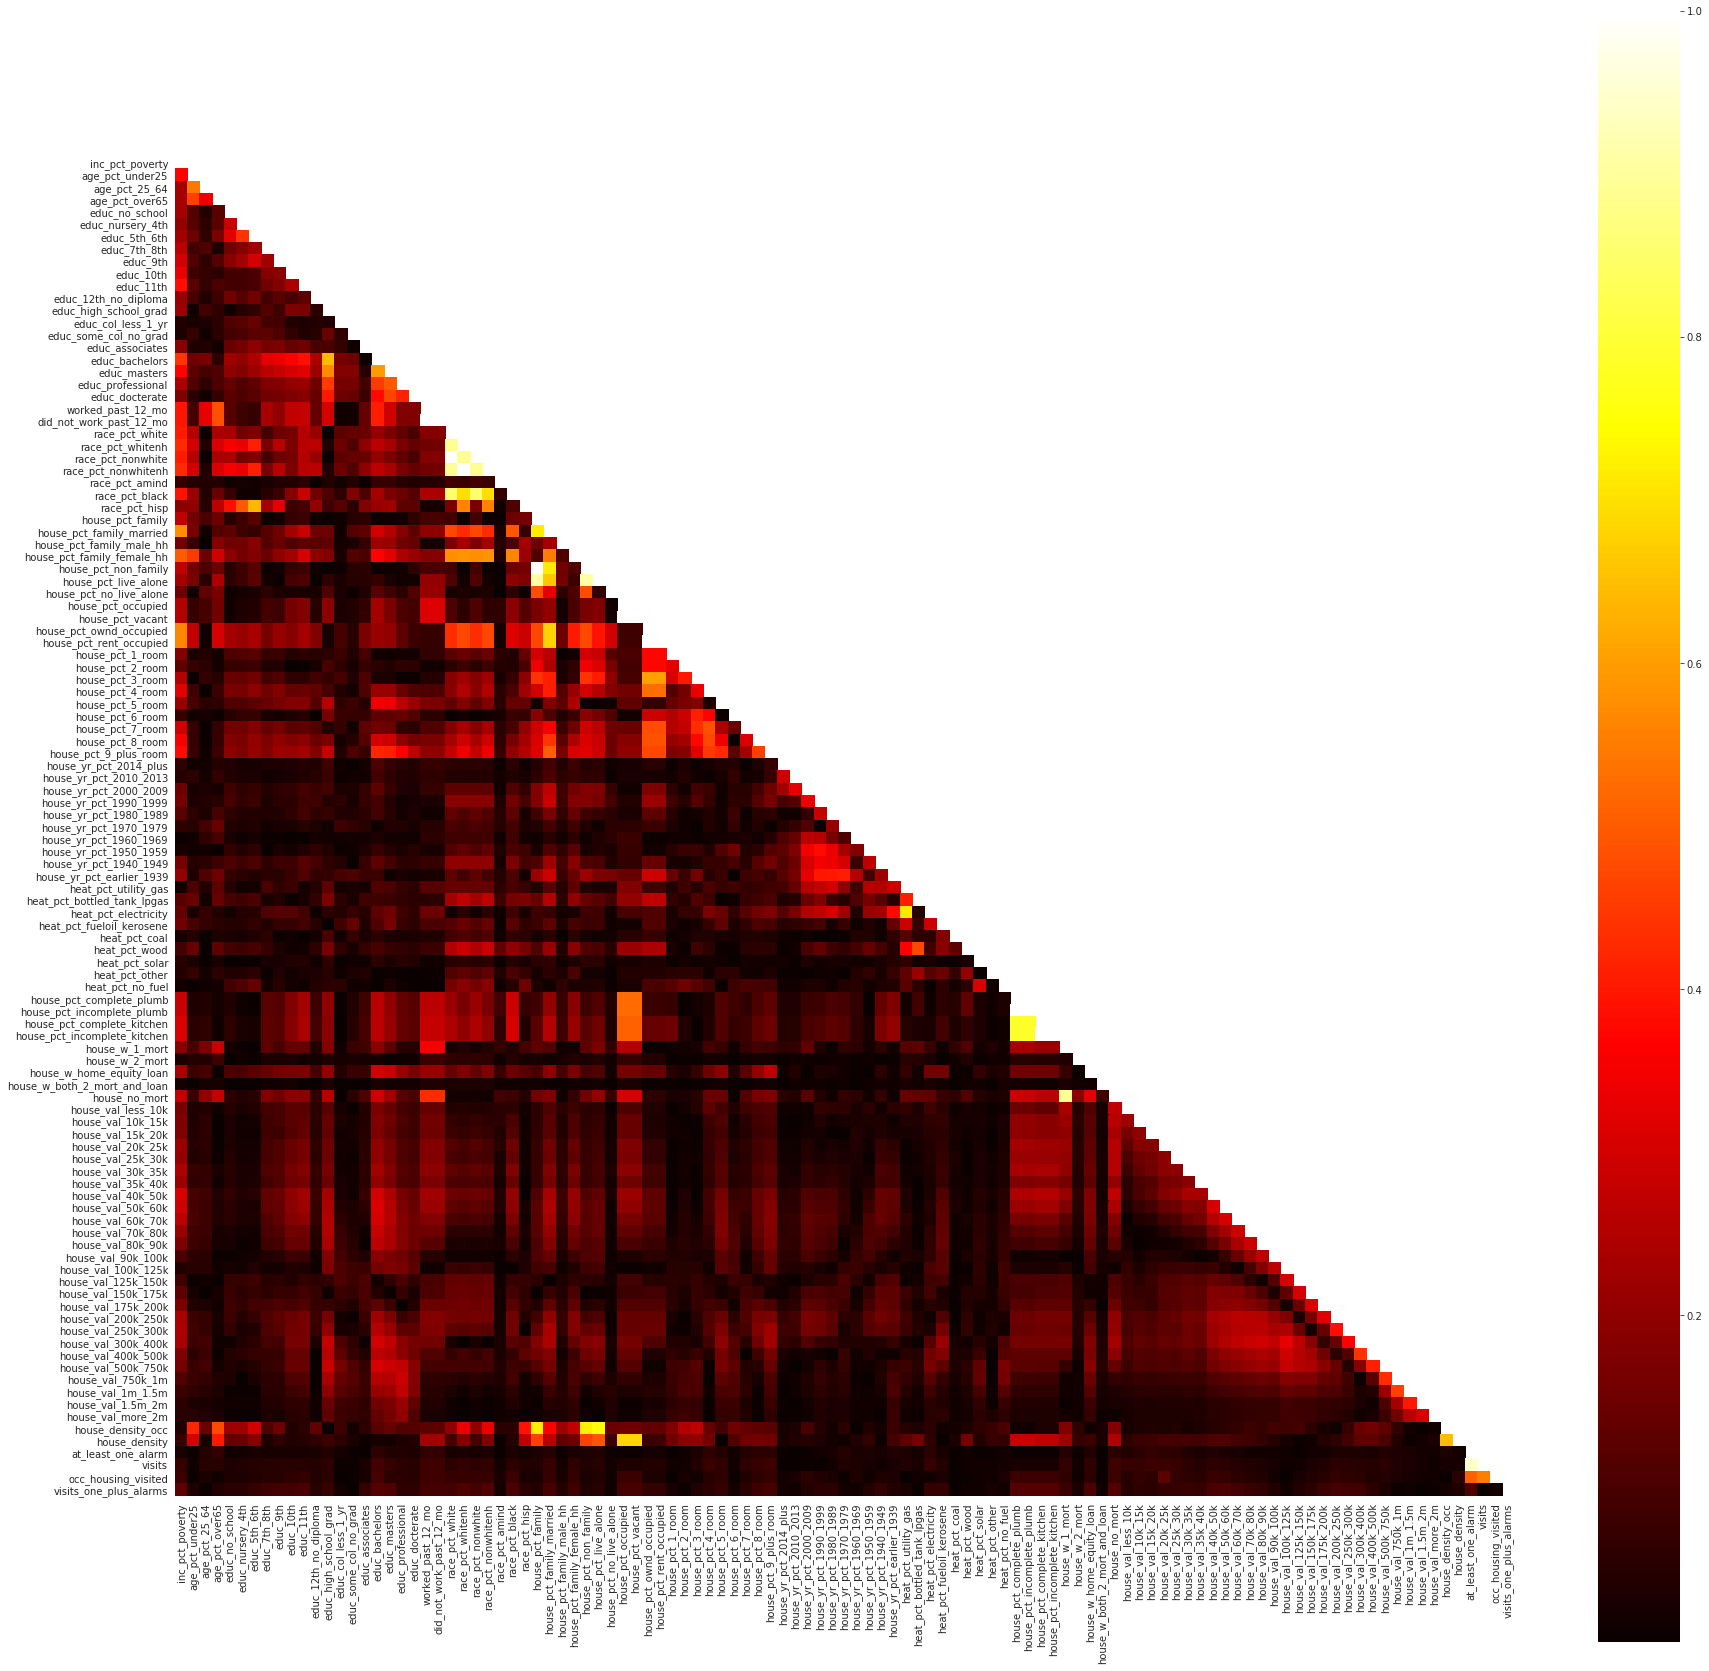

In [51]:
# plot correlation heatmap with non-percentage variables removed
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,30))
with sns.axes_style("white"):
    p2 = sns.heatmap(corr_matrix, mask=mask, square=True, cmap="hot")
plt.show()

In [52]:
# check correlations with target variable
corr_matrix.visits_one_plus_alarms.sort_values(ascending=False)

visits_one_plus_alarms          1.000000
inc_pct_poverty                 0.127503
house_pct_complete_plumb        0.113296
house_pct_incomplete_plumb      0.113296
house_no_mort                   0.112324
house_pct_complete_kitchen      0.110034
house_pct_incomplete_kitchen    0.110034
educ_bachelors                  0.109889
at_least_one_alarm              0.109308
race_pct_whitenh                0.105206
race_pct_nonwhitenh             0.105206
educ_masters                    0.104379
house_w_home_equity_loan        0.099096
house_val_50k_60k               0.098748
race_pct_black                  0.097456
house_val_40k_50k               0.096543
educ_11th                       0.094678
house_pct_occupied              0.093646
house_pct_vacant                0.093646
house_pct_9_plus_room           0.092399
house_pct_family_married        0.090422
house_val_200k_250k             0.090422
worked_past_12_mo               0.089336
did_not_work_past_12_mo         0.089336
race_pct_white  

#### Variance

In [53]:
# check variances for extremes
df[kept_columns].var().sort_values(ascending=False)

visits                          228.393947
at_least_one_alarm              134.778929
visits_one_plus_alarms            0.136168
race_pct_whitenh                  0.106651
race_pct_nonwhitenh               0.106651
heat_pct_utility_gas              0.102828
race_pct_white                    0.084135
race_pct_nonwhite                 0.084135
heat_pct_electricity              0.080888
race_pct_black                    0.069923
house_pct_ownd_occupied           0.056040
house_pct_rent_occupied           0.056040
house_yr_pct_earlier_1939         0.049726
race_pct_hisp                     0.044720
house_no_mort                     0.034231
house_pct_family_married          0.032876
house_density                     0.029788
house_w_1_mort                    0.029452
heat_pct_fueloil_kerosene         0.023454
house_pct_family                  0.022657
house_pct_non_family              0.022657
inc_pct_poverty                   0.020926
house_yr_pct_1950_1959            0.020873
house_yr_pc

#### Outliers
##### Boxplot

In [62]:
# group variables
numeric_acs_columns = df.describe().T[df.describe().T['max'] > 1].T.drop(columns=['house_density', 'at_least_one_alarm', 'visits']).columns.to_list()
target_variable = ['visits_one_plus_alarms']
arc_variables = ['at_least_one_alarm', 'visits']
housing_variables = [var for var in remaining if var.find('hous') != -1]
race_variables = [var for var in remaining if var.find('race') != -1]
educ_variables = [var for var in remaining if var.find('educ') != -1]
income_variables = [var for var in remaining if var.find('pov') != -1]

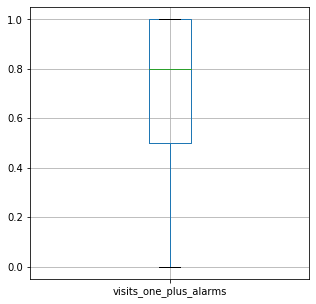

In [64]:
df[target_variable].boxplot(figsize=(5,5))
plt.show()

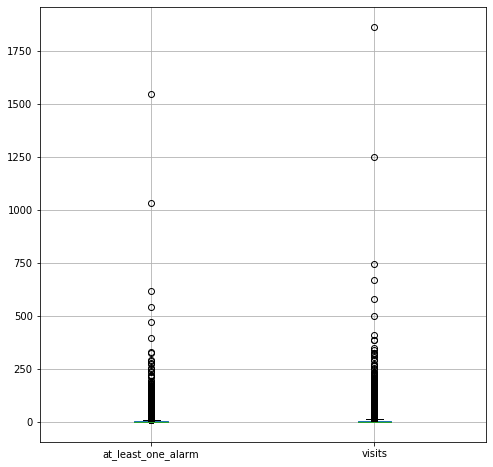

In [66]:
df[arc_variables].boxplot(figsize=(8,8))
plt.show()

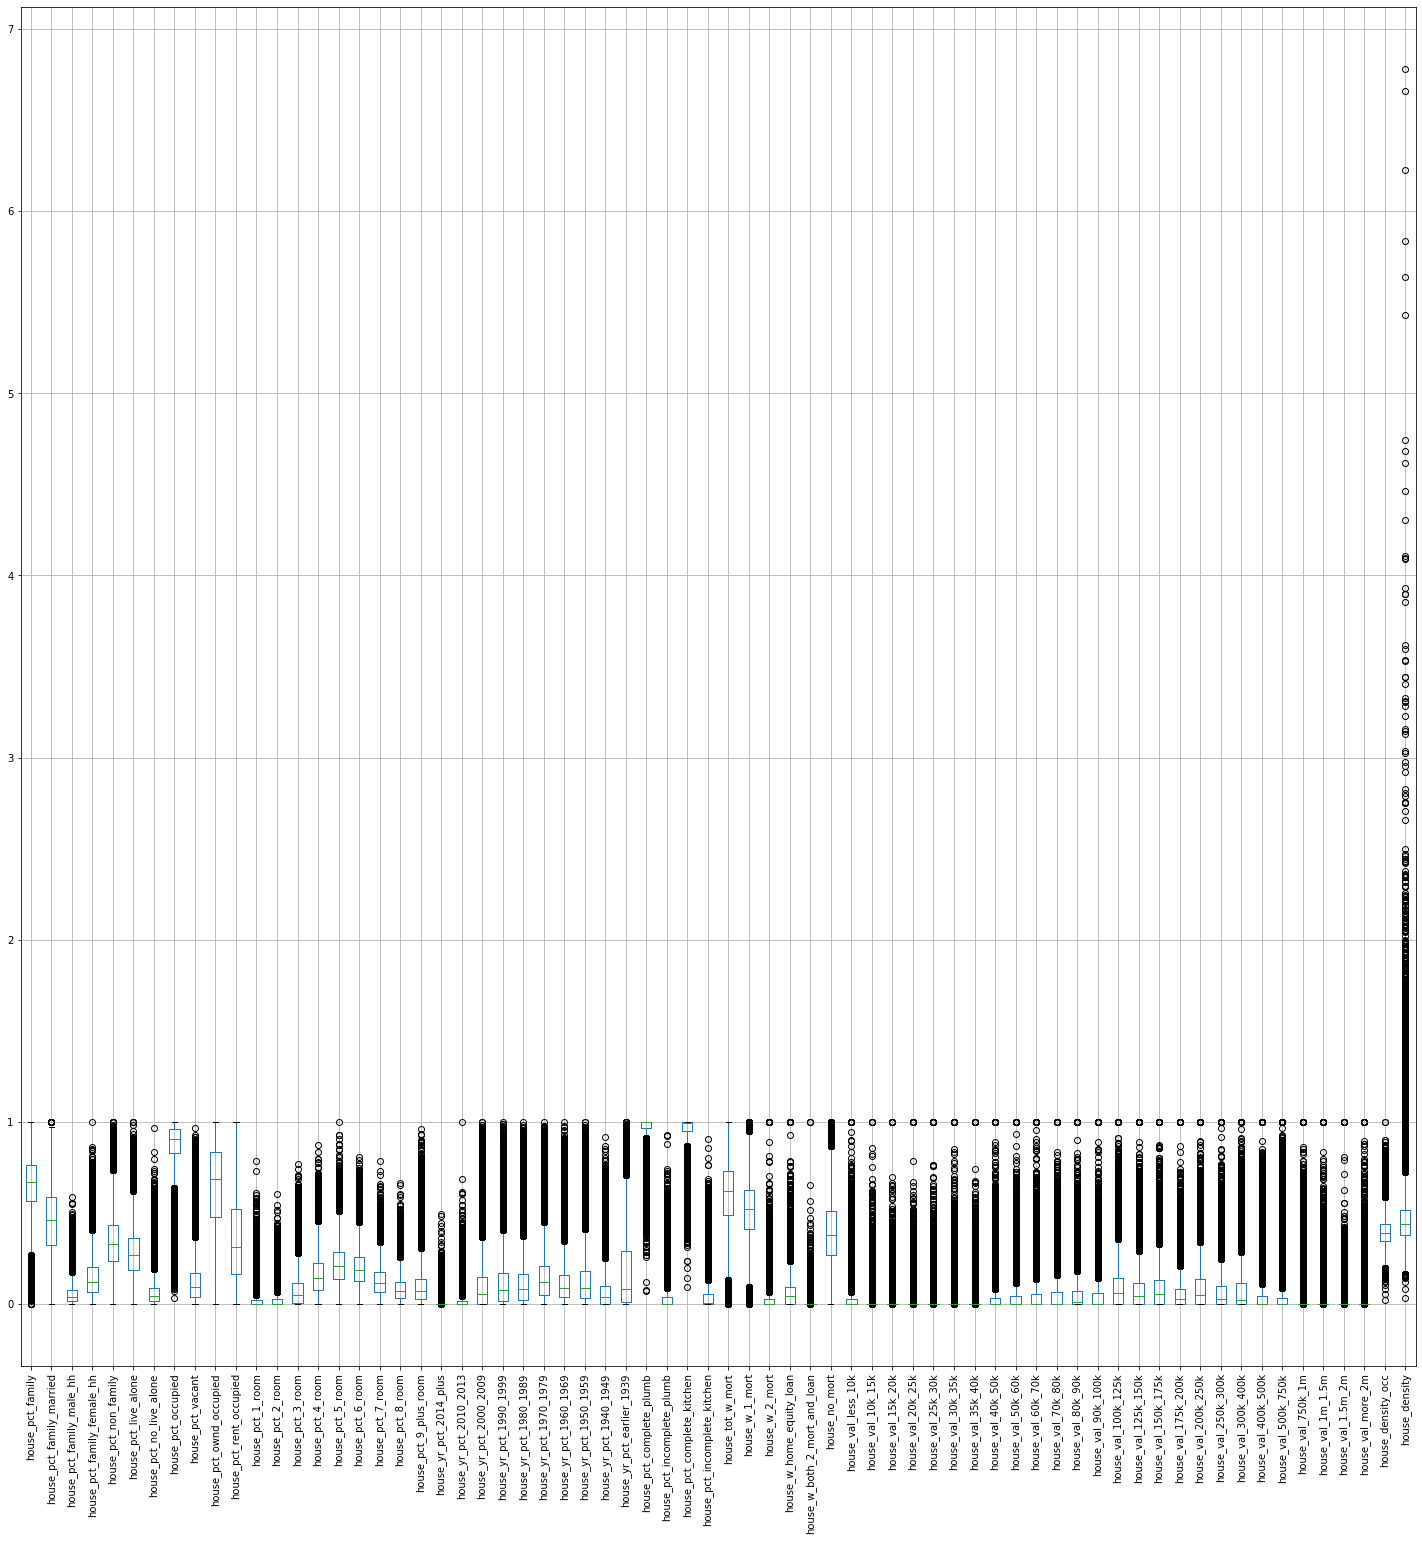

In [55]:
df[housing_variables].boxplot(figsize=(25,25))
plt.xticks(rotation=90)
plt.show()

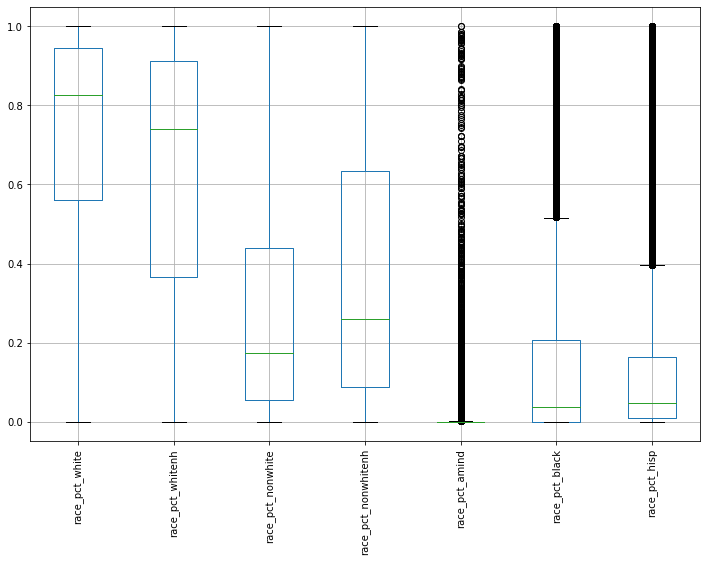

In [56]:
df[race_variables].boxplot(figsize=(12,8))
plt.xticks(rotation=90)
plt.show()

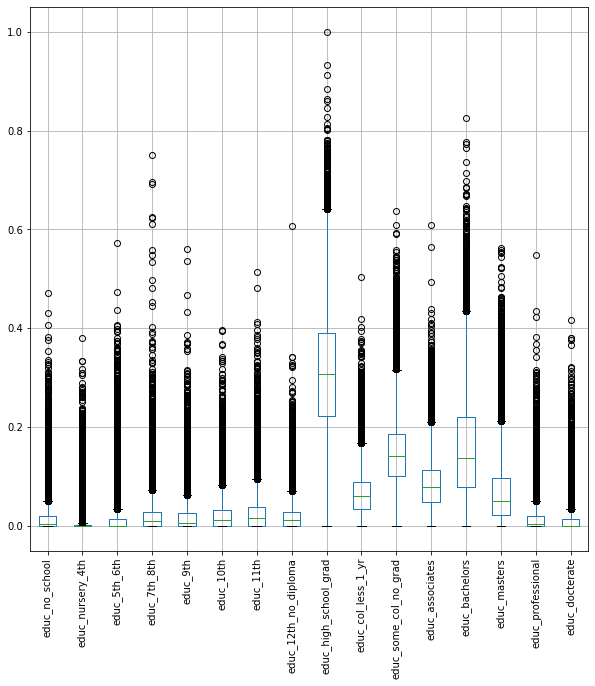

In [57]:
df[educ_variables].boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

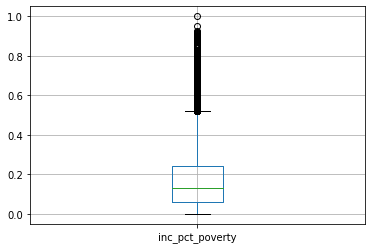

In [58]:
df[income_variables].boxplot();

#### Distributions

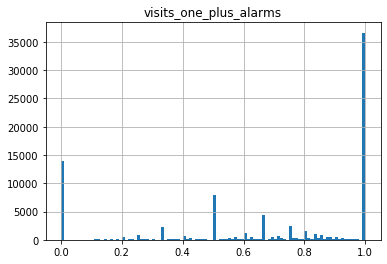

In [67]:
df[target_variable].hist(bins=100);

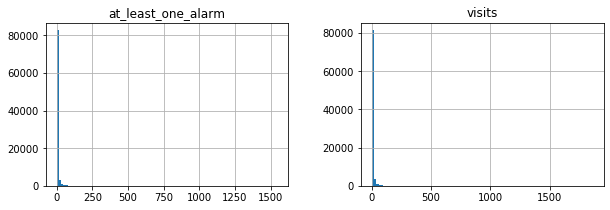

In [71]:
df[arc_variables].hist(bins=100, figsize=(10,3));

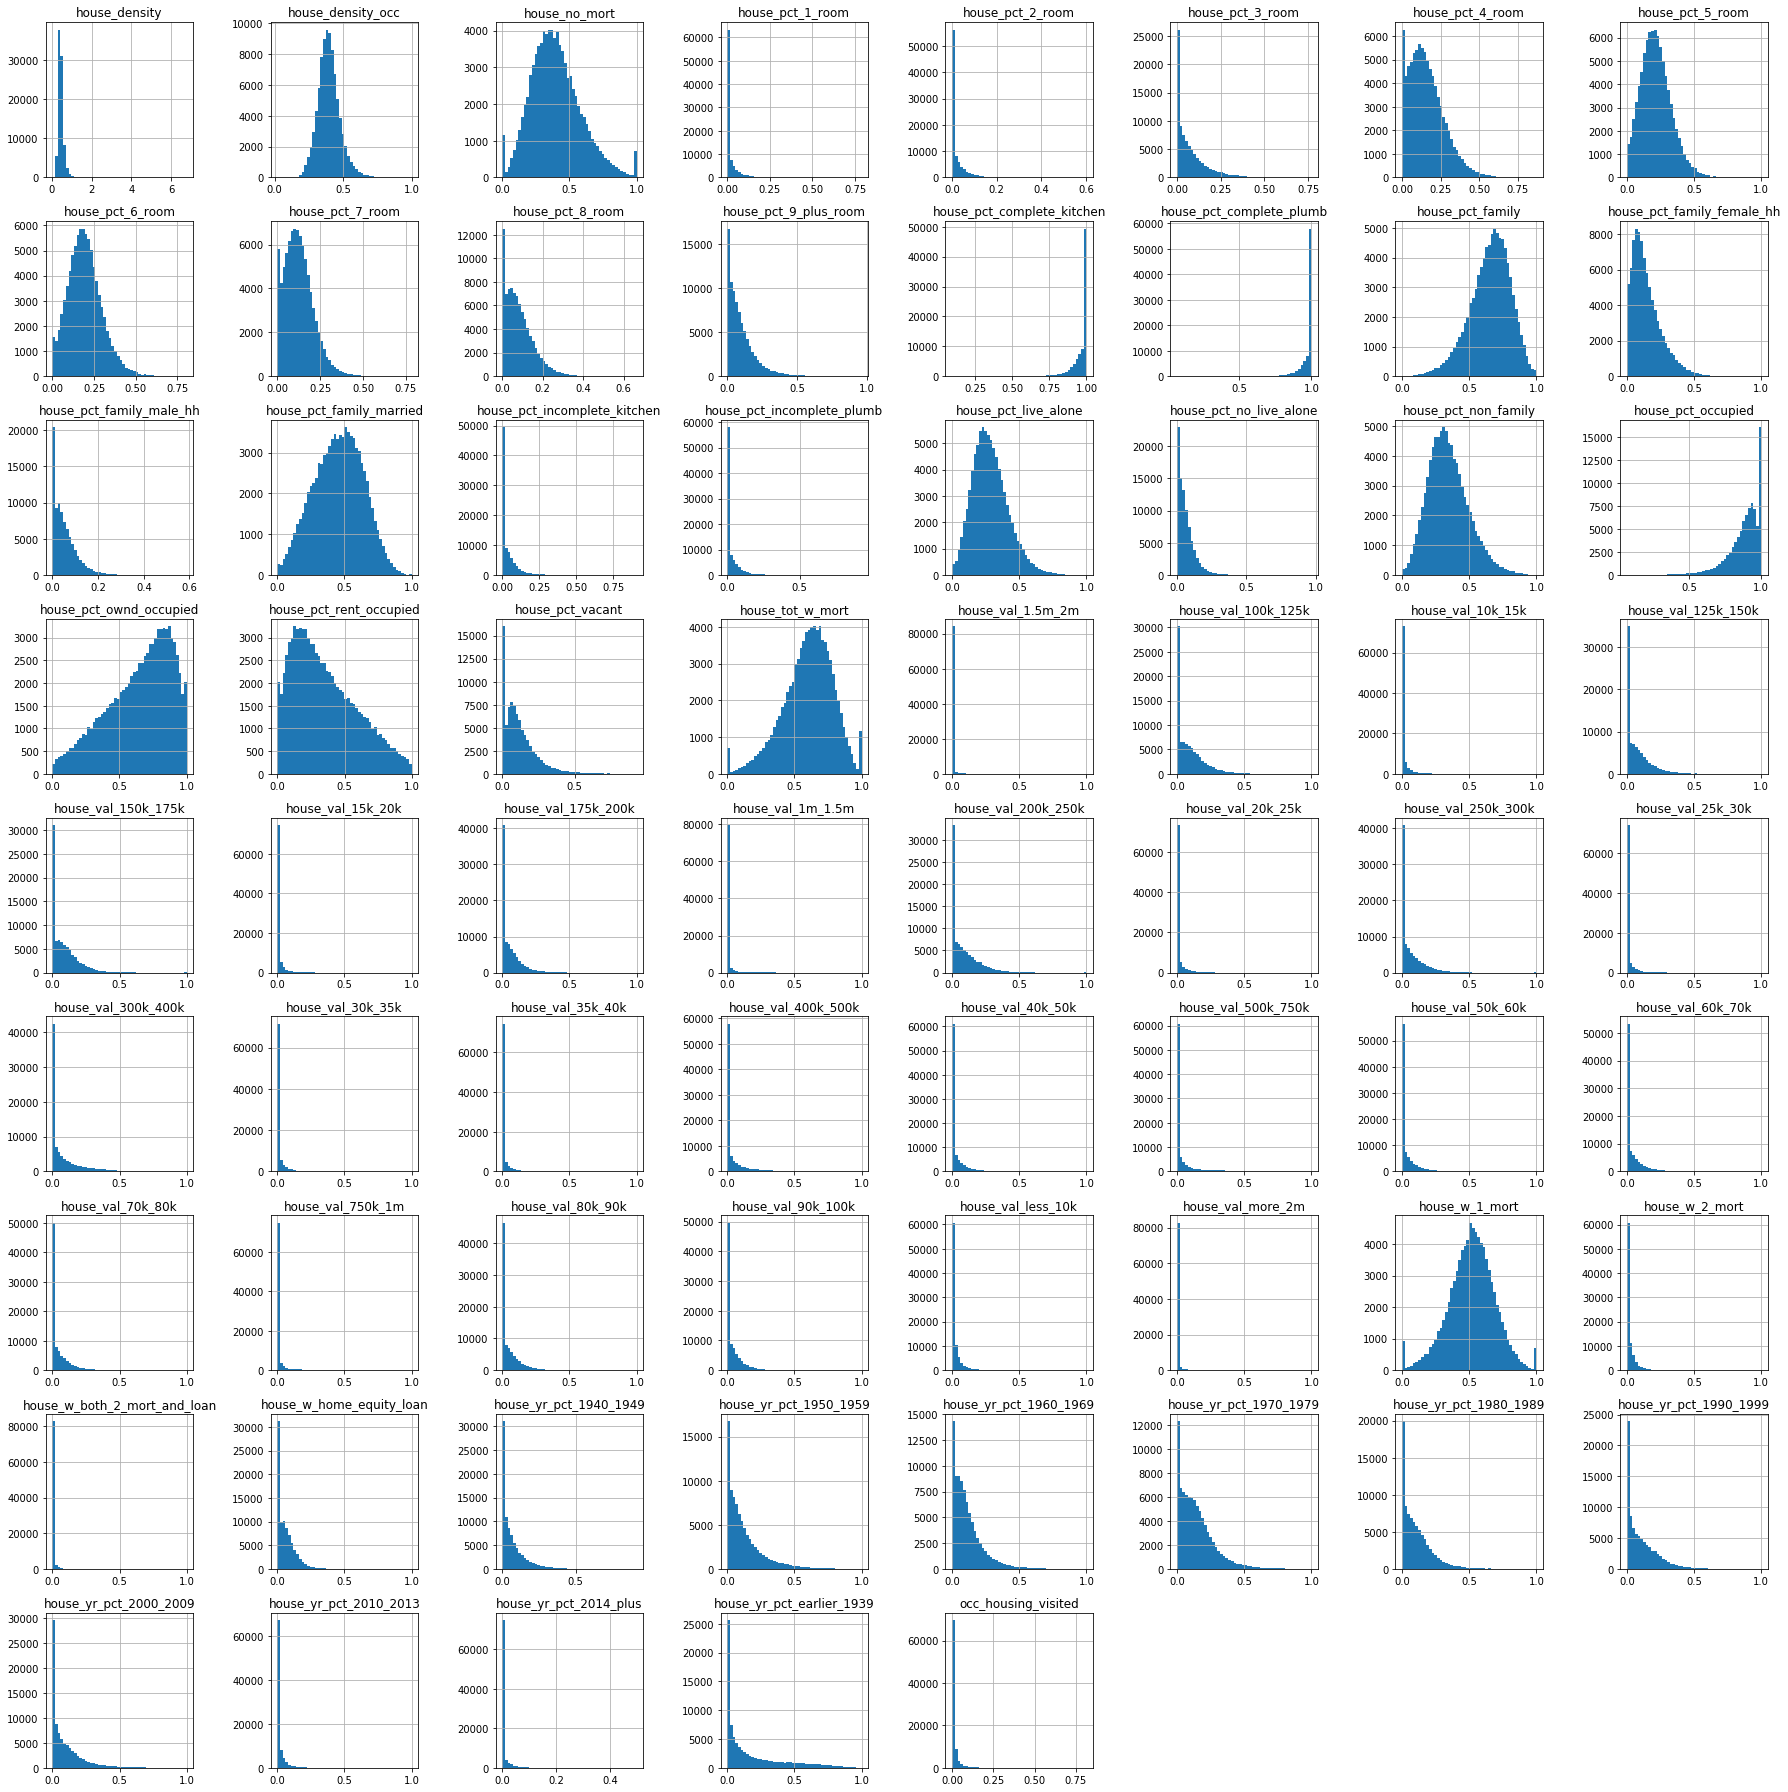

In [88]:
df[housing_variables].hist(bins=50, figsize=(25,25))
plt.tight_layout()
plt.show()

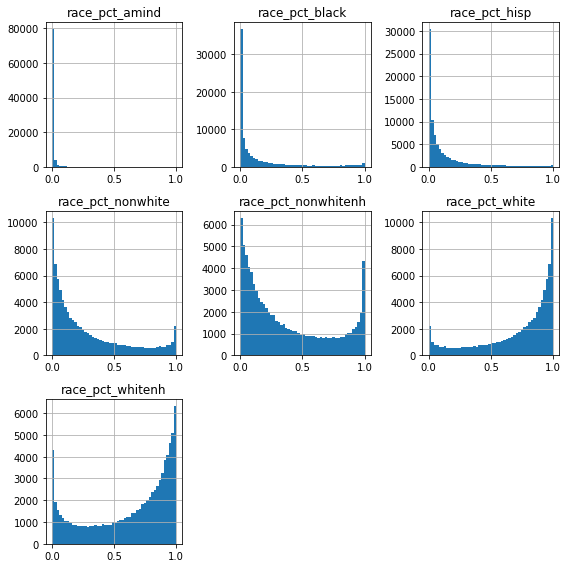

In [94]:
df[race_variables].hist(bins=50, figsize=(8,8))
plt.tight_layout()
plt.show()

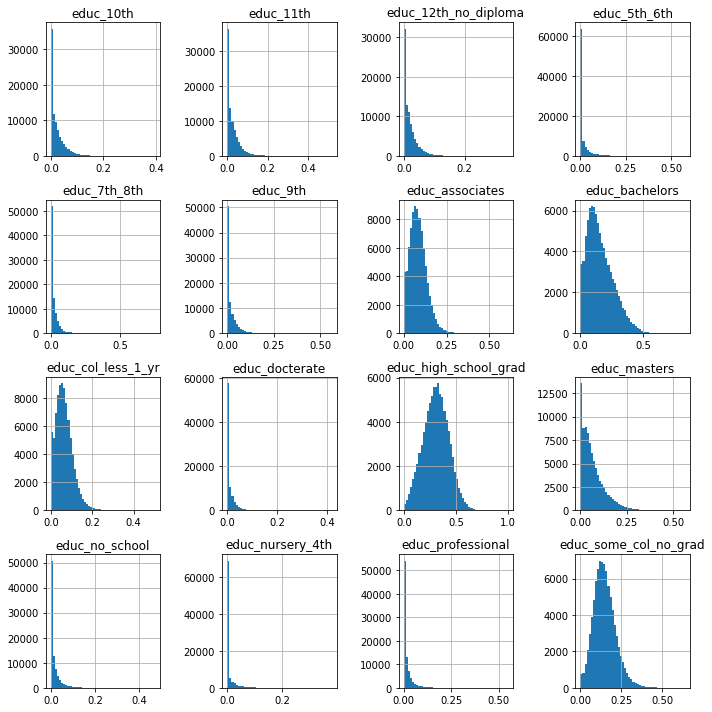

In [95]:
df[educ_variables].hist(bins=50, figsize=(10,10))
plt.tight_layout()
plt.show()

### Additional Understanding